## Basic Text Processing with SpaCy

In [ ]:
data = pd.read_json('../input/nlp-course/restaurant.json')
data.head()

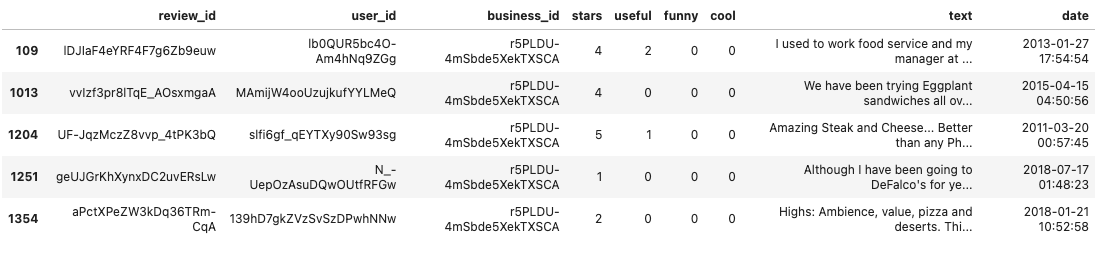

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

index_of_review_to_test_on = 14
text_to_test_on = data.text.iloc[index_of_review_to_test_on]

# Load the SpaCy model
nlp = spacy.blank('en')

# Create the tokenized version of text_to_test_on
review_doc = nlp(text_to_test_on)

# Create the PhraseMatcher object. The tokenizer is the first argument. Use attr = 'LOWER' to make consistent capitalization
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

# Create a list of tokens for each item in the menu
menu_tokens_list = [nlp(item) for item in menu]
matcher.add("MENU", menu_tokens_list)
matches = matcher(review_doc)

### Matching the whole dataset

In [ ]:
from collections import defaultdict

# item_ratings is a dictionary of lists. If a key doesn't exist in item_ratings,
# the key is added with an empty list as the value.
item_ratings = defaultdict(list)

for idx, review in data.iterrows():
    doc = nlp(review.text)
    # Using the matcher from the previous exercise
    matches = matcher(doc)
    
    # Create a set of the items found in the review text
    found_items = set([doc[match[1]:match[2]].lower_ for match in matches])
    
    for item in found_items:
        item_ratings[item].append(review.stars)

In [ ]:
# Calculate the mean ratings for each menu item as a dictionary
mean_ratings = {item: sum(ratings)/len(ratings) for item, ratings in item_ratings.items()}

# Find the worst item, and write it as a string in worst_item. This can be multiple lines of code if you want.
worst_item = sorted(mean_ratings, key=mean_ratings.get)[0]

In [ ]:
counts = {item: len(ratings) for item, ratings in item_ratings.items()}

item_counts = sorted(counts, key=counts.get, reverse=True)
for item in item_counts:
    print(f"{item:>25}{counts[item]:>5}")

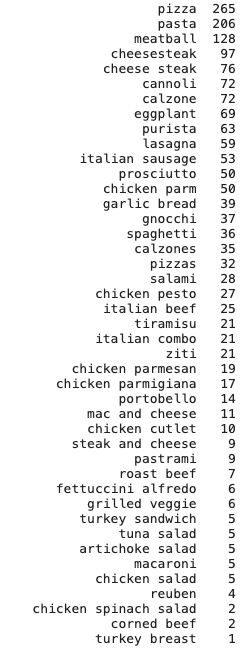

In [ ]:
sorted_ratings = sorted(mean_ratings, key=mean_ratings.get)

print("Worst rated menu items:")
for item in sorted_ratings[:10]:
    print(f"{item:20} Ave rating: {mean_ratings[item]:.2f} \tcount: {counts[item]}")
    
print("\n\nBest rated menu items:")
for item in sorted_ratings[-10:]:
    print(f"{item:20} Ave rating: {mean_ratings[item]:.2f} \tcount: {counts[item]}")

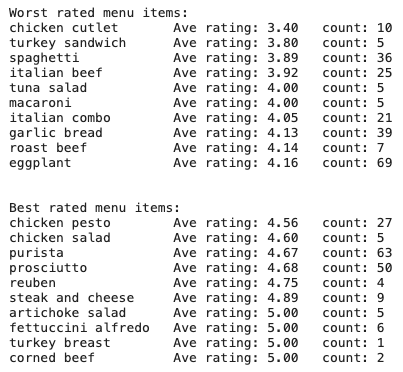